[UCI Machine Learning Repository: Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)


### bank client data:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.graph_objs as go

In [2]:
df = pd.read_csv("data/bank.csv")
df.shape

(11162, 17)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


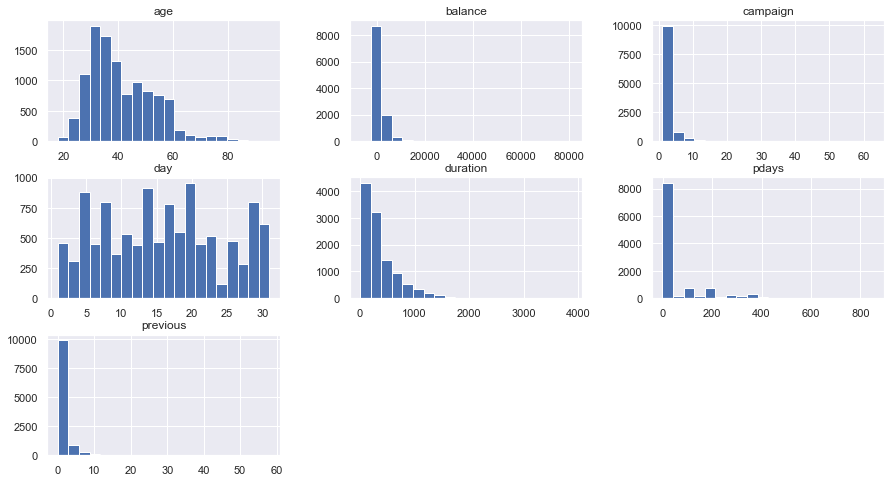

In [7]:
h = df.hist(figsize=(15, 8), bins=20)

In [8]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

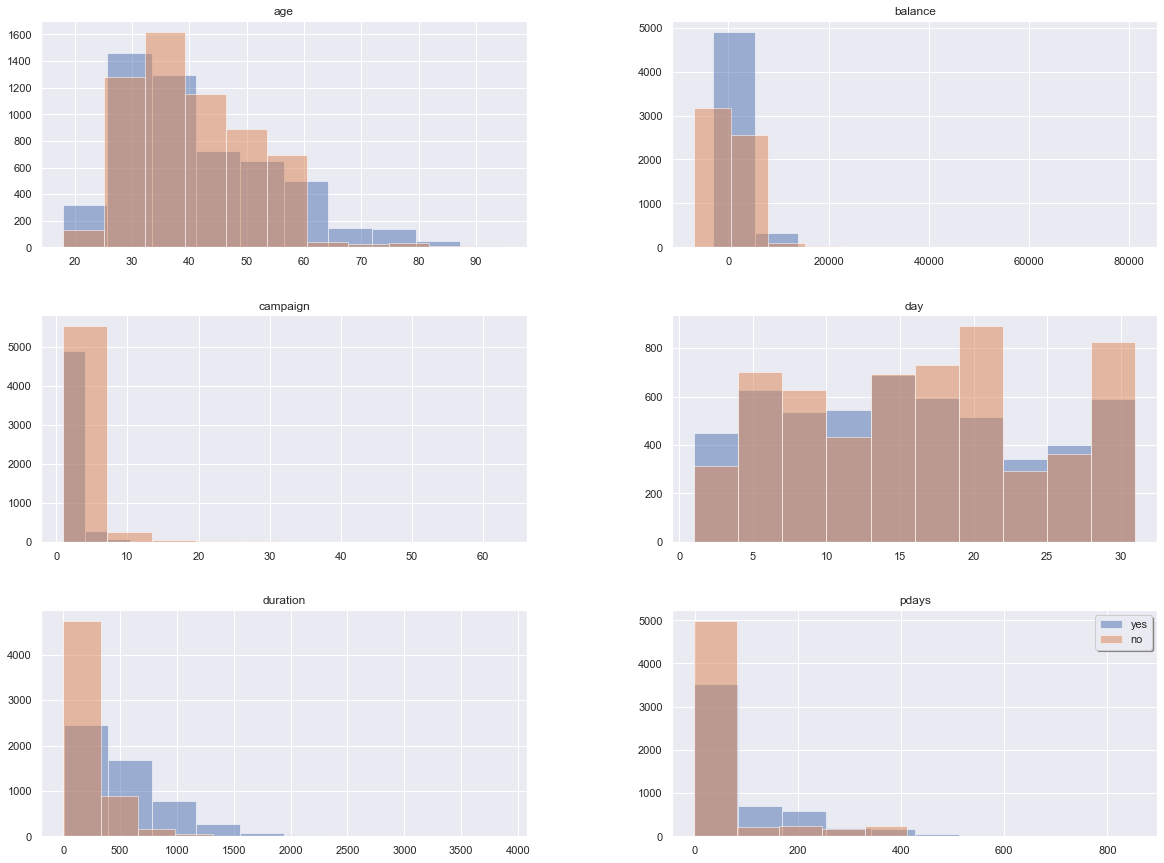

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
h = df.loc[df["deposit"] == "yes", num_cols[:6]].hist(alpha=0.5, ax=ax)
h = df.loc[df["deposit"] == "no", num_cols[:6]].hist(alpha=0.5, ax=ax)
plt.legend(['yes', 'no'], shadow=True)

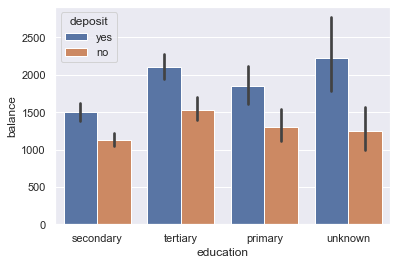

In [10]:
sns.barplot(data=df, x="education", y="balance", hue="deposit")

In [11]:
object_desc = df.describe(include="object")
object_desc

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [12]:
col_object = object_desc.columns
col_object

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

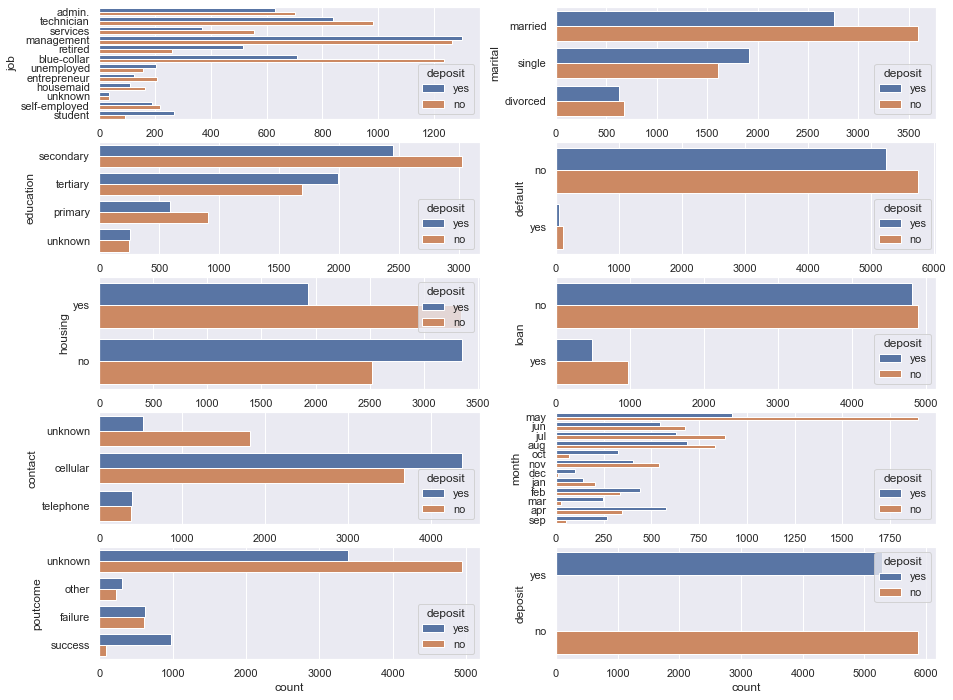

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
for i, column in enumerate(col_object):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, y=column, hue="deposit", ax = axes[row, col])

In [14]:
col_object

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [15]:
object_unique_count = object_desc.loc["unique"]
object_unique_count = object_unique_count.sort_values()
object_unique_count

default       2
housing       2
loan          2
deposit       2
marital       3
contact       3
education     4
poutcome      4
job          12
month        12
Name: unique, dtype: object

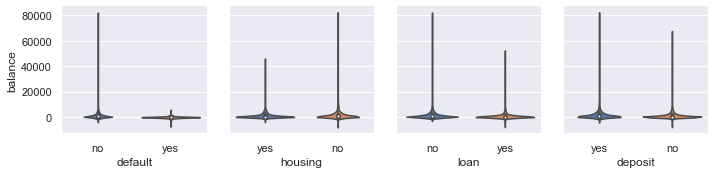

In [16]:
g = sns.PairGrid(data=df, x_vars=object_unique_count.index[:4], y_vars="balance")
g.map(sns.violinplot)

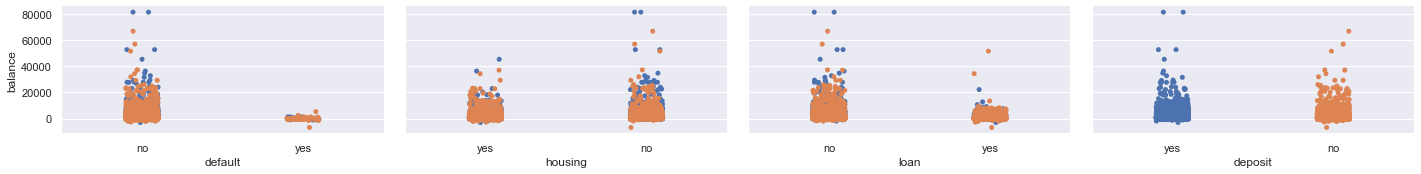

In [17]:
g = sns.PairGrid(data=df, x_vars=object_unique_count.index[:4], y_vars="balance", hue="deposit", aspect=2)
g.map(sns.stripplot)

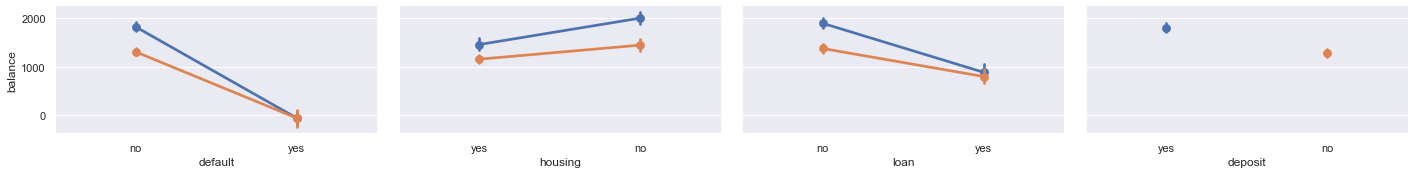

In [18]:
g = sns.PairGrid(data=df, 
                 x_vars=object_unique_count.index[:4], 
                 y_vars="balance", 
                 hue="deposit", aspect=2)
g.map(sns.pointplot)

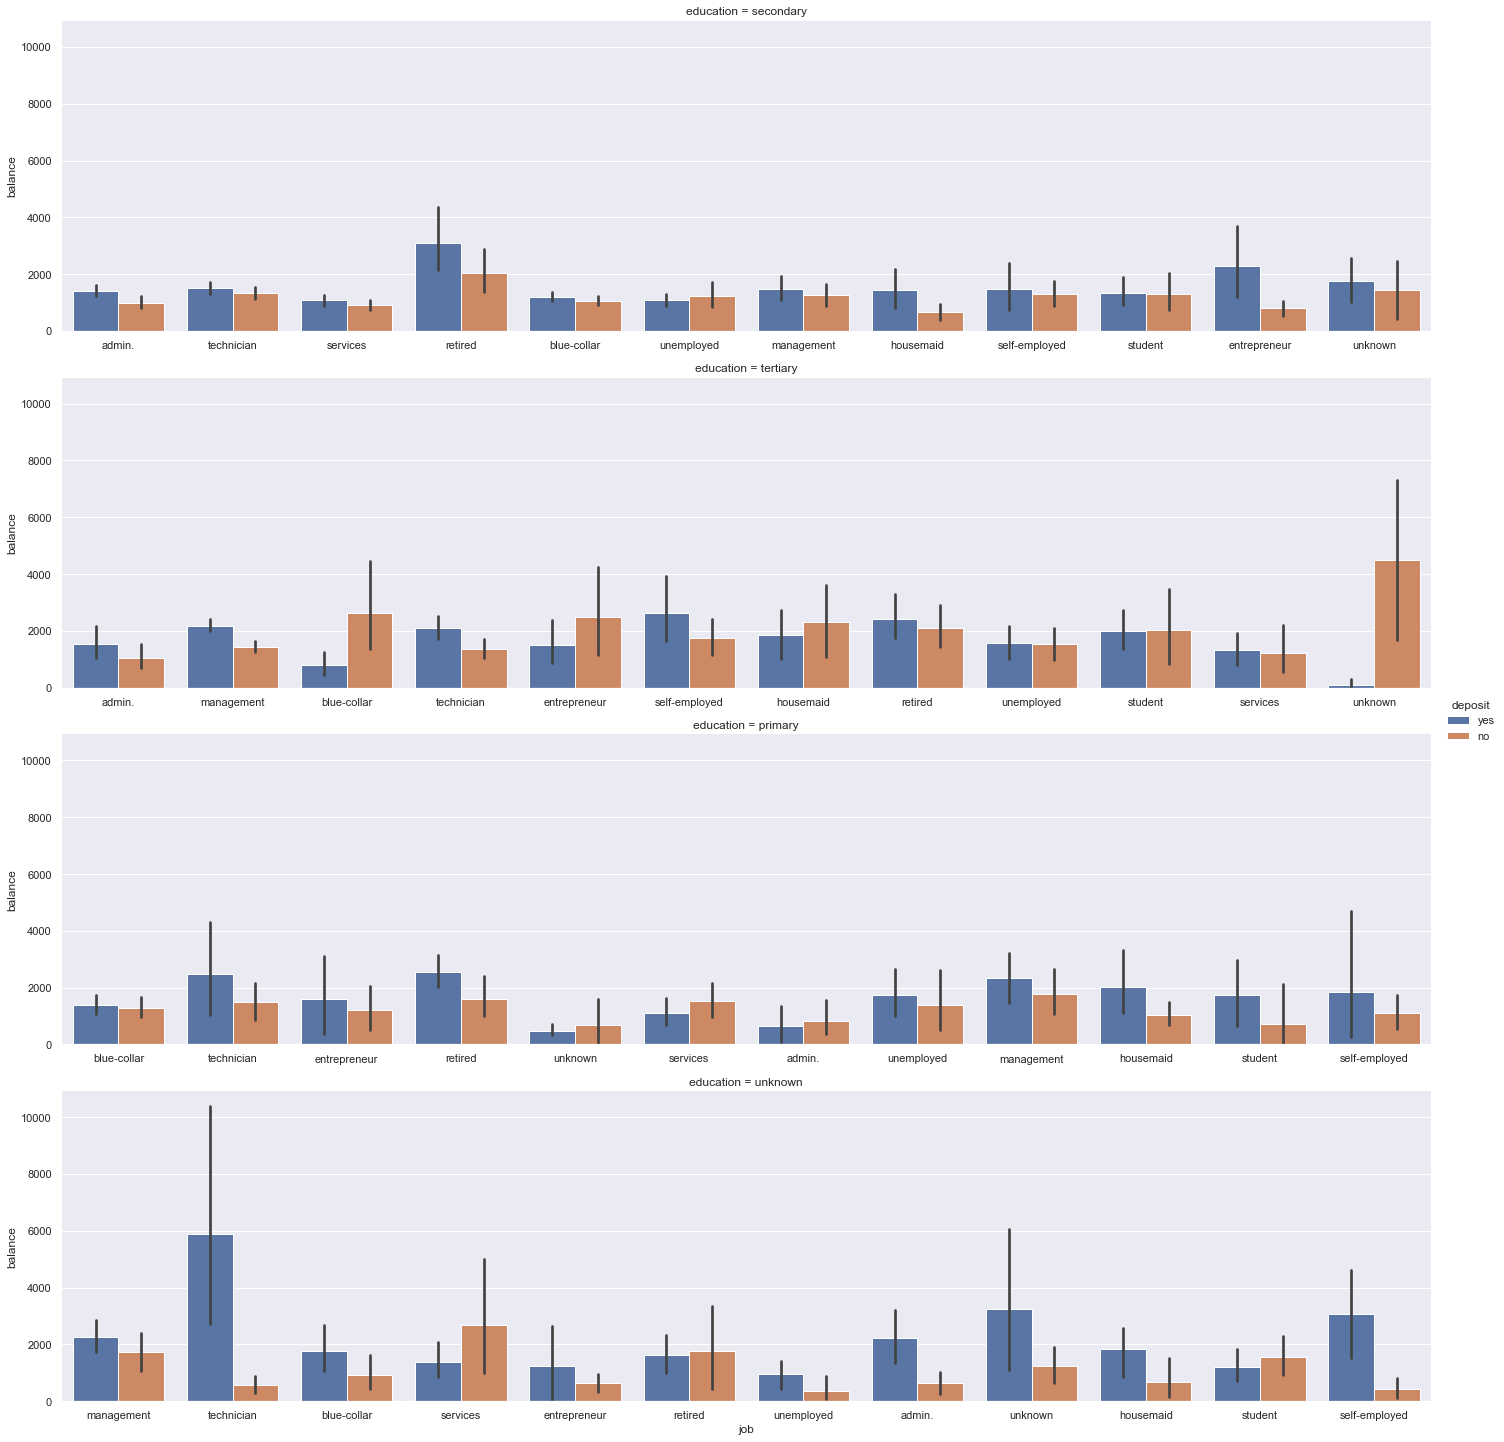

In [19]:
sns.catplot(data=df, x="job", y="balance", hue="deposit", col="education", 
            kind="bar", col_wrap=1, aspect=4, sharex=False)

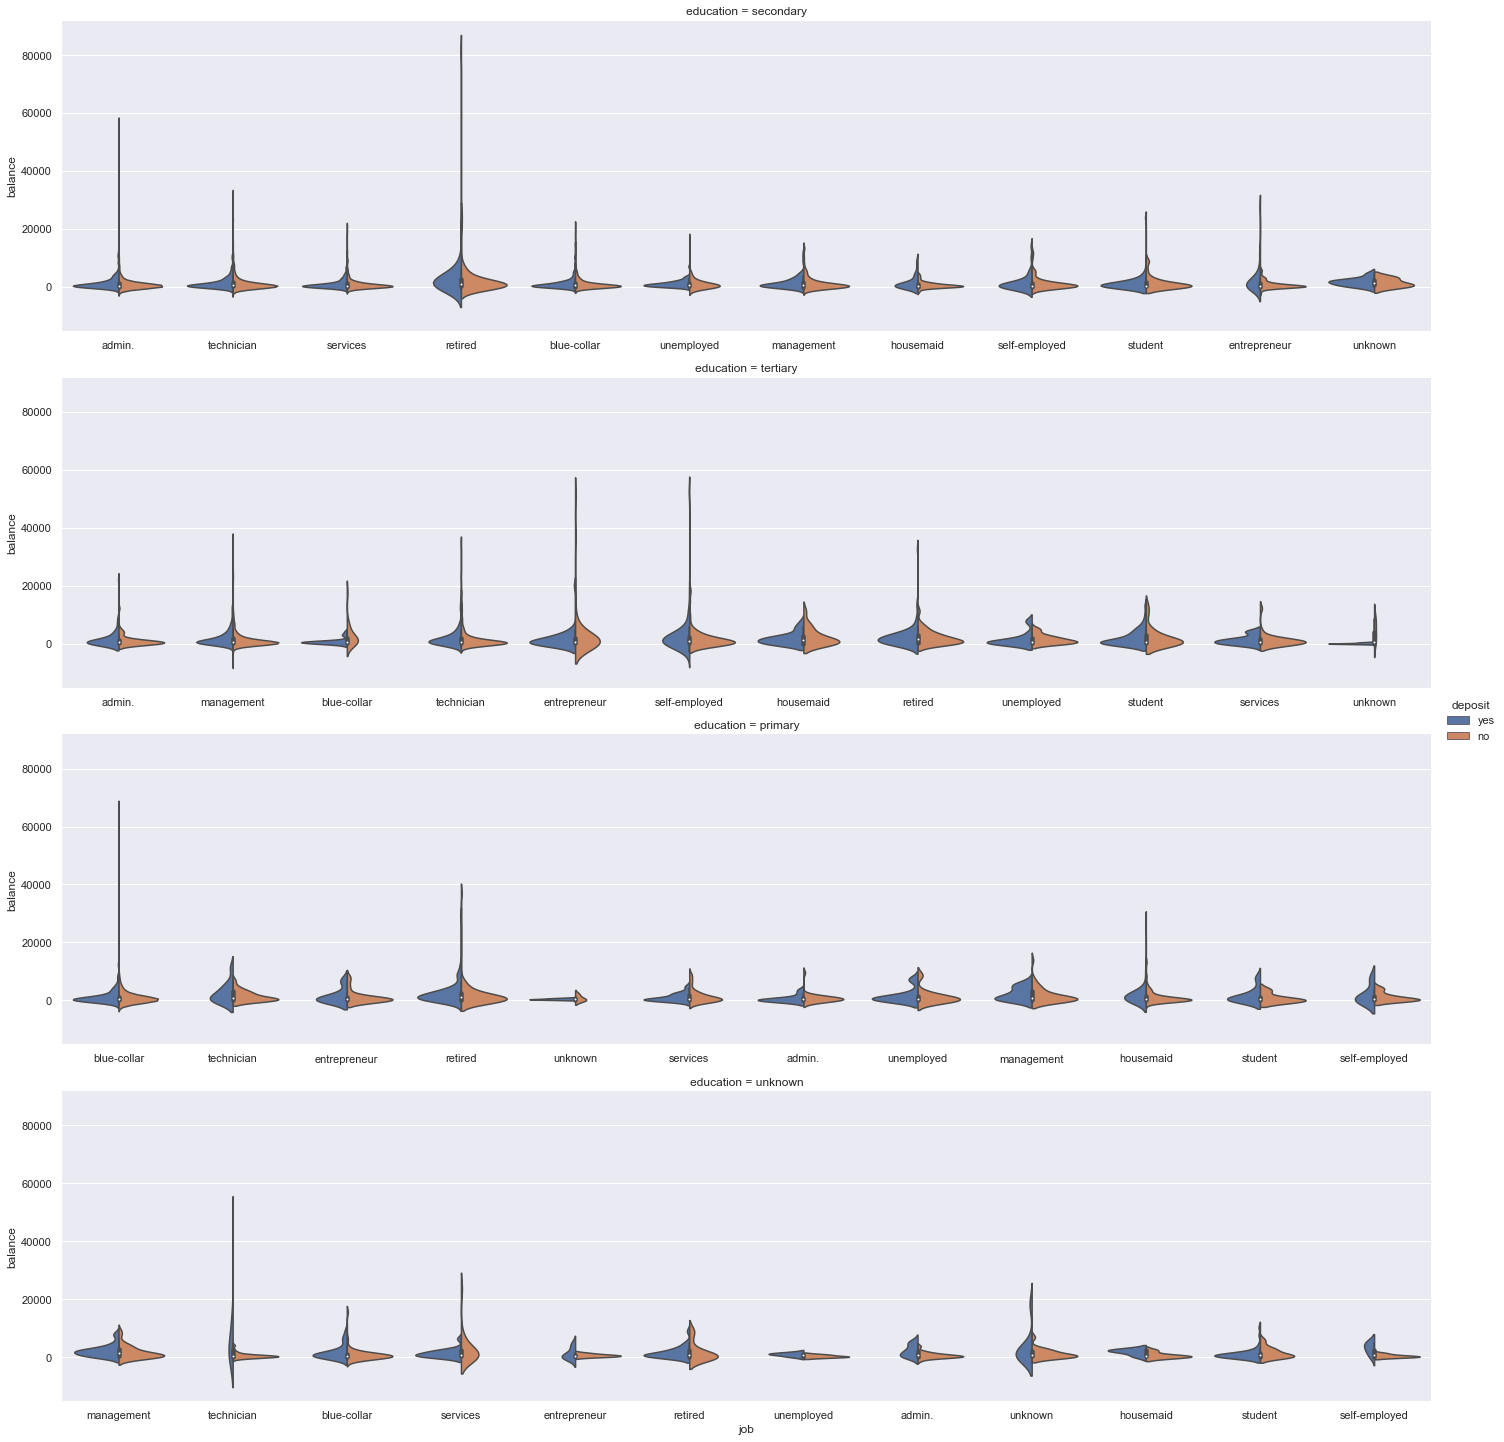

In [20]:
sns.catplot(data=df, x="job", y="balance", hue="deposit", col="education", 
            kind="violin", split=True, col_wrap=1, aspect=4, sharex=False)

In [21]:
corr = df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


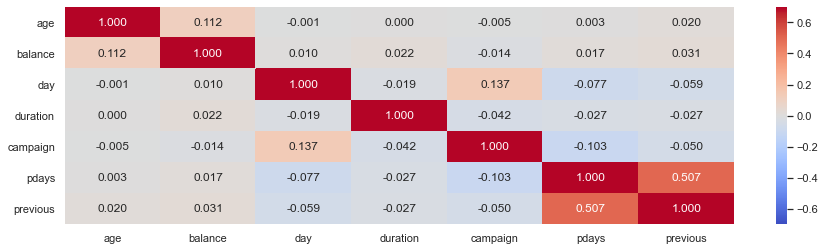

In [22]:
plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm", vmin=-.7, vmax=.7)

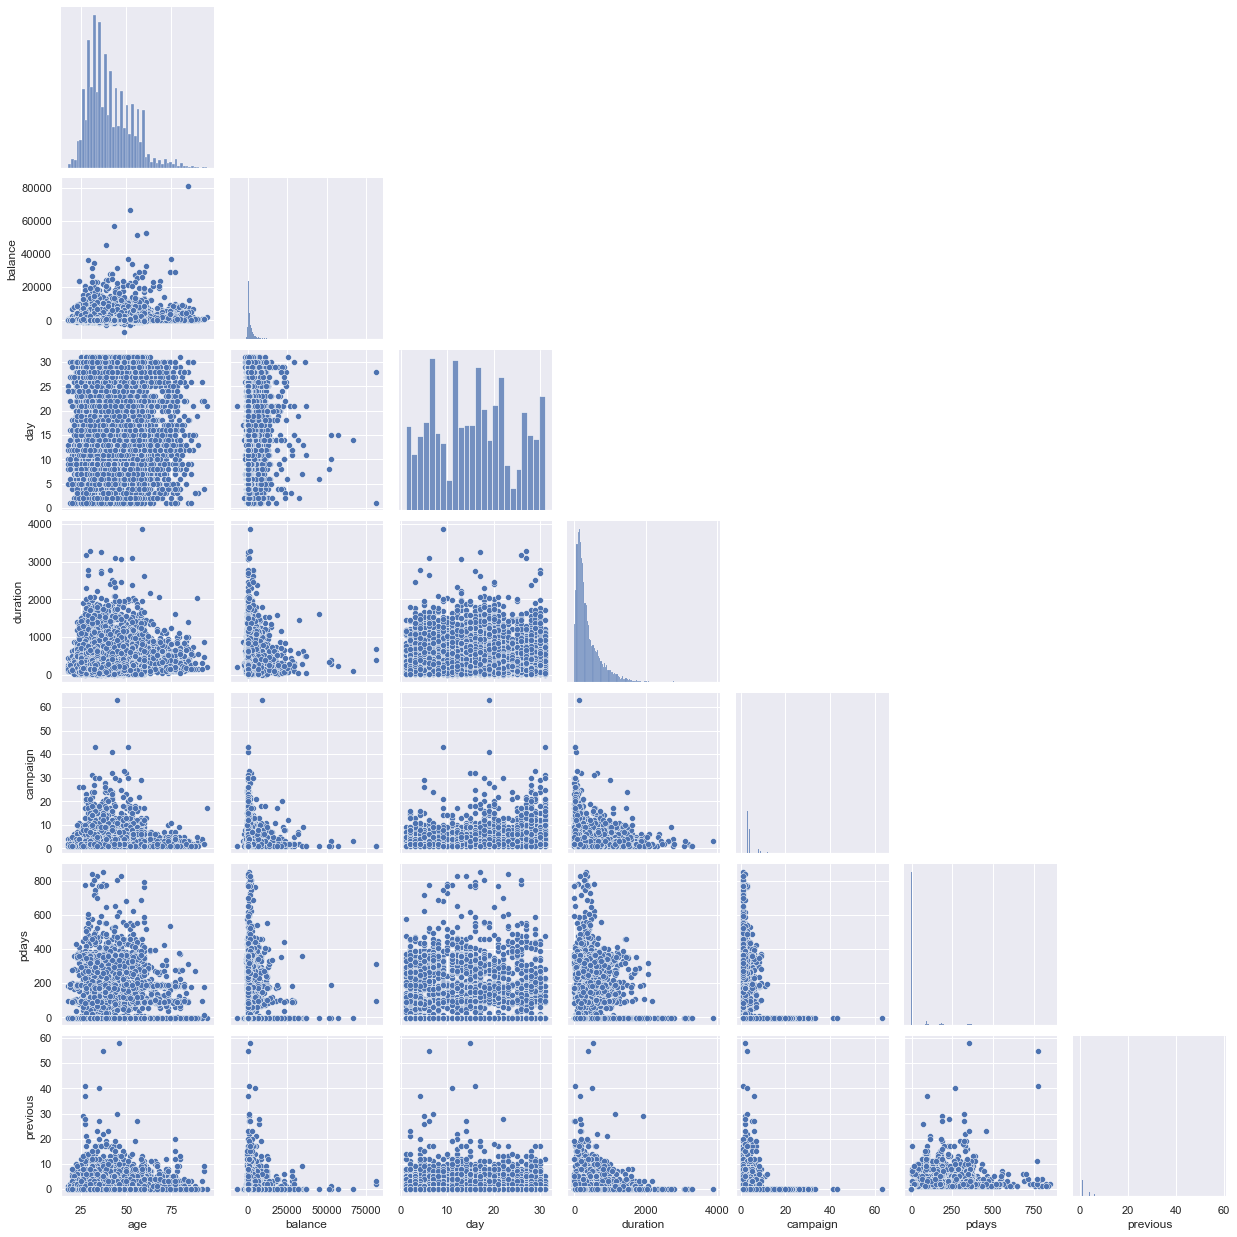

In [23]:
sns.pairplot(df, corner=True)

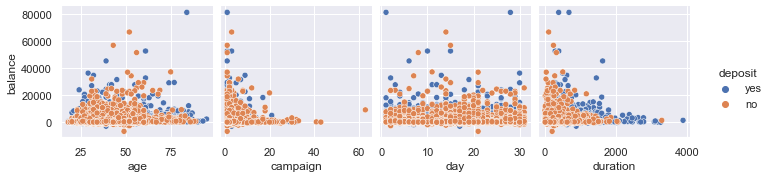

In [24]:
sns.pairplot(data=df, 
             x_vars=["age", "campaign", "day", "duration"], 
             y_vars=["balance"], 
             hue="deposit", 
             diag_kind=None)

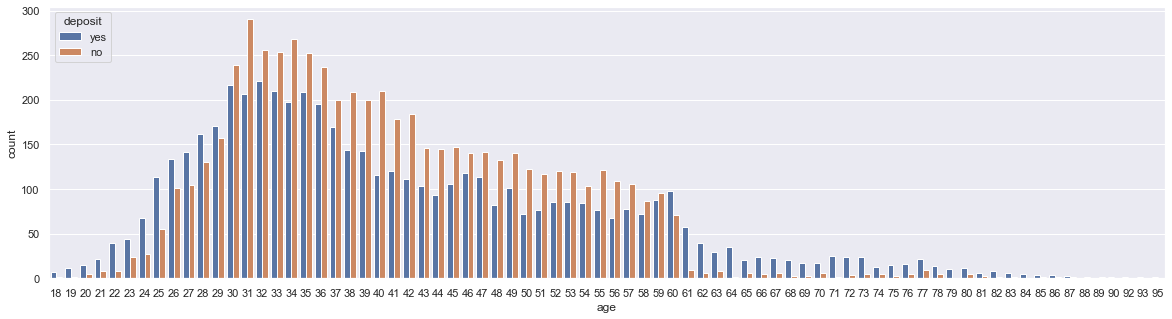

In [25]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x="age", hue="deposit")

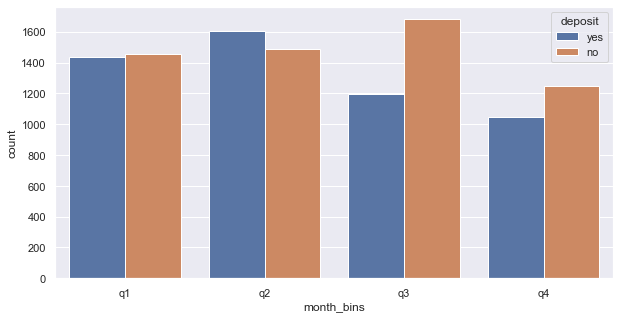

In [26]:
df["month_bins"]=pd.cut(df.day,bins=4, labels=["q1","q2","q3","q4"])
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="month_bins", hue="deposit")

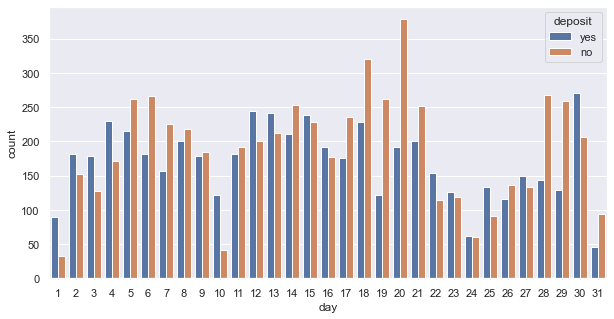

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x="day",hue="deposit",data=df)

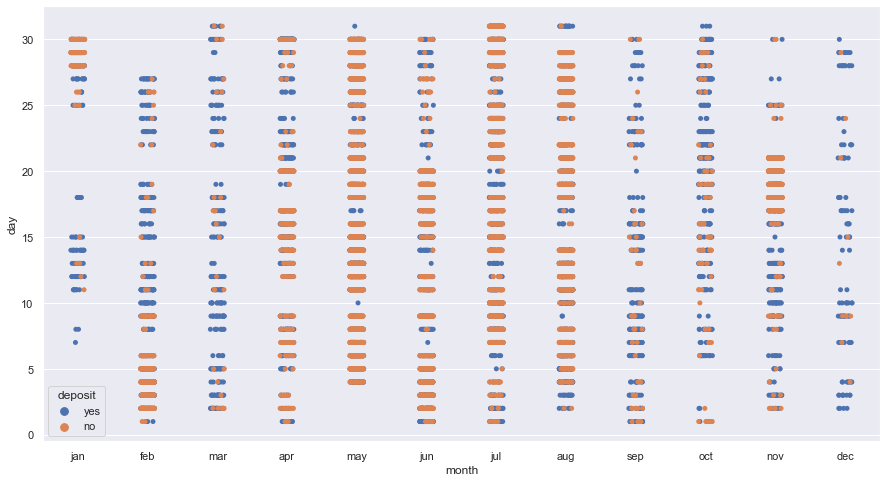

In [28]:
plt.figure(figsize=(15, 8))
sns.stripplot(data=df, x="month",y="day", hue="deposit",
              order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))